# Descriptive (Spatial) Analytics

Analyze taxi demand patterns for the relevant one-year period and 
city (please check carefully which year your team has been allocated). 

Specifically show how these
patterns (start time, trip length, start and end location, price, average idle time between trips, and so 
on) for the given sample varies in different spatio-temporal resolution (i.e., census tract vs. varying
hexagon diameter and/or temporal bin sizes). 

Give possible reasons for the observed patterns.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import descriptive as desc

c:\Users\Fabi\OneDrive\Fabian\Uni\Uni Köln\Semester II\Advanced Analytics & Applications\project\AAA_2023_AdvancedPythonPandas\descriptive.py:16: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  exploded_city_bounding_poly = gdf.explode()


In [3]:
palette = "turbo"

In [8]:
df = pd.read_csv("./data/datasets/df_chicago.csv.zip")
df["Trip_Minutes"] = np.floor(df["Trip_Seconds"] / 60)
df.info()

BadZipFile: File is not a zip file

## Start Time

### Census Tract

In [ ]:
df["Pickup_C->Dropoff_C"] = df["Pickup_Census_Tract"].astype(str)+"->"+df["Dropoff_Census_Tract"].astype(str)

In [ ]:
#How many rides start per district
grouped = df[["Pickup_Census_Tract", "Trip_Minutes"]].groupby("Pickup_Census_Tract").count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
Pickup_Census_Tract,
1.703128e+10,280532
1.703108e+10,363559
1.703108e+10,382655
1.703132e+10,485983
1.703184e+10,814316


In [ ]:
#How many rides end per district
grouped = df[["Dropoff_Census_Tract", "Trip_Minutes"]].groupby("Dropoff_Census_Tract").count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
Dropoff_Census_Tract,
1.703128e+10,283616
1.703108e+10,286083
1.703108e+10,309481
1.703132e+10,410732
1.703184e+10,741576


In [ ]:
#How many rides start per district
grouped = df[["Pickup_C->Dropoff_C", "Trip_Minutes"]].groupby("Pickup_C->Dropoff_C").count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
Pickup_C->Dropoff_C,
17031081500.0->17031839100.0,60865
17031839100.0->17031320100.0,61548
17031839100.0->17031839100.0,77024
17031320100.0->17031839100.0,77573
nan->nan,2621863


### Diff temporal bin sizes

Hour, Day, Week, Month

#### Hour bin size

<Axes: xlabel='start_time_hourly', ylabel='Count'>

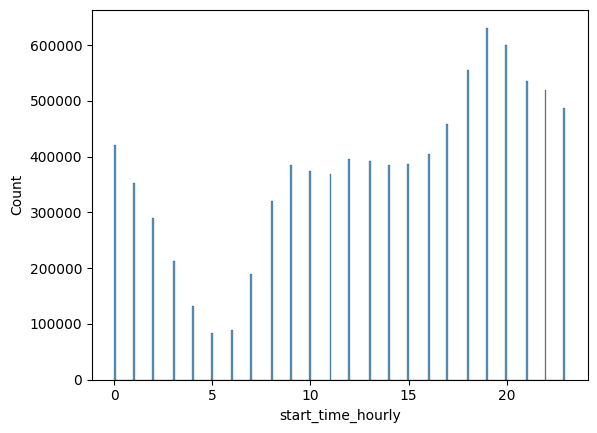

In [ ]:
sns.histplot(df["start_time_hourly"])

In [ ]:
#How many rides start per district
grouped = df[["start_time_hourly", "Trip_Minutes"]].groupby(["start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()


desc.descr_stat(df, columns=["start_time_hourly", "Trip_Minutes"], group_by=["start_time_hourly"], sort=True, sort_by=["Trip_Minutes"], as_index=False, agg_mode="count", plot=True)


NameError: name 'df' is not defined

#### Day Bin size

<Axes: xlabel='Day_Ordered', ylabel='Count'>

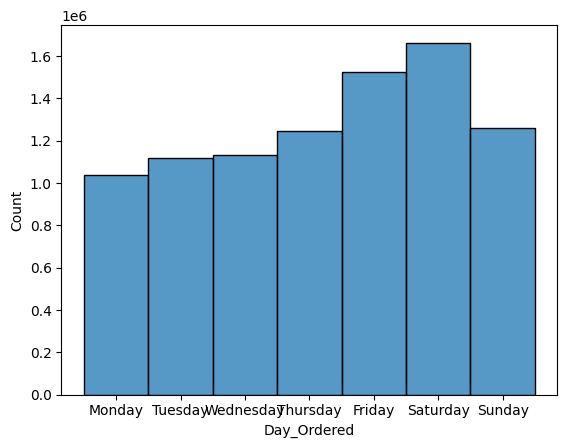

In [ ]:
#How many rides per day
df['Day_Ordered'] = pd.Categorical(df['dayOfWeek'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sns.histplot(df["Day_Ordered"])

In [ ]:
#How many rides start per district
grouped = df[["dayOfWeek", "start_time_hourly", "Trip_Minutes"]].groupby(["dayOfWeek", "start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()


desc.descr_stat(df, columns=["Day_Ordered", "start_time_hourly", "Trip_Minutes"], group_by=["Day_Ordered", "start_time_hourly"], sort=True, sort_by=["Trip_Minutes"], as_index=False, agg_mode="count", plot=True)


Count
dayOfWeek start_time_hourly        
Friday    19                 120252
          20                 120541
Saturday  20                 120620
          23                 124567
Sunday    0                  125118

In [ ]:

desc.descr_stat(df, columns=["Day_Ordered", "start_time_hourly", "Trip_Minutes"], group_by=["Day_Ordered", "start_time_hourly"], sort=True, sort_by=["Trip_Minutes"], as_index=False, agg_mode="mean", plot=True)


#### Week bin size

<Axes: xlabel='start_time_week', ylabel='Count'>

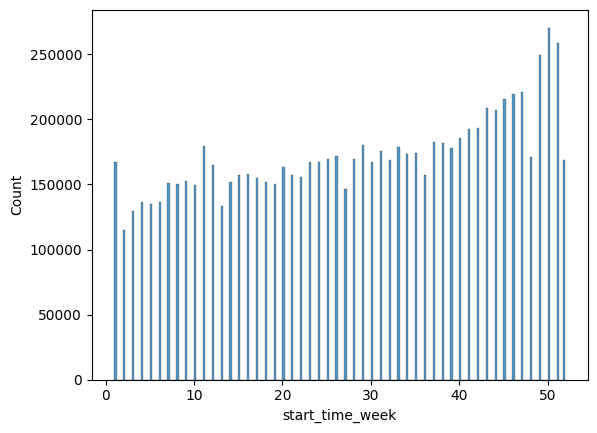

In [ ]:
sns.histplot(df["start_time_week"])

In [ ]:
#How many rides start per district
grouped = df[["start_time_week", "start_time_hourly", "Trip_Minutes"]].groupby(["start_time_week", "start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
start_time_week start_time_hourly       
49              19                 18147
51              20                 18301
                19                 18799
50              20                 19427
                19                 19924

#### Month bin size

<Axes: xlabel='start_time_month', ylabel='Count'>

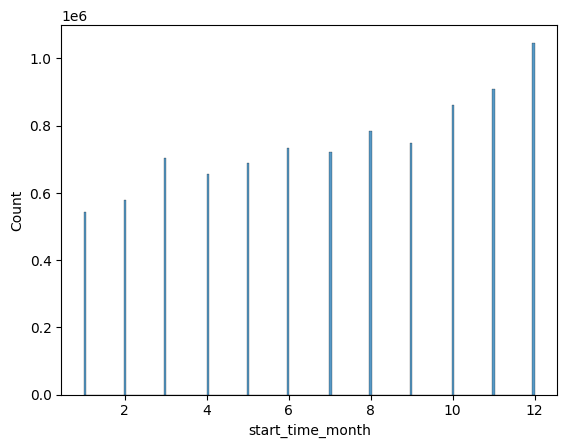

In [ ]:
sns.histplot(df["start_time_month"])

In [ ]:
#How many rides start per district
grouped = df[["start_time_month", "start_time_hourly", "Trip_Minutes"]].groupby(["start_time_month", "start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()


desc.descr_stat(df, columns=["start_time_month", "start_time_hourly", "Trip_Minutes"], group_by=["start_time_month", "start_time_hourly"], sort=True, sort_by=["Trip_Minutes"], as_index=False, agg_mode="count", plot=True)


Count
start_time_month start_time_hourly       
11               19                 64053
12               18                 64213
                 21                 65557
                 20                 74450
                 19                 75544

### Varying hexagon diameter

### Different Hexagon Resolutions

In [ ]:
#How many rides start per district
grouped = df[["h3_hex_id_low_res", "start_time_hourly", "Trip_Miles"]].groupby(["h3_hex_id_low_res", "start_time_hourly"]).count().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Count"})
grouped.tail()

Count
h3_hex_id_low_res start_time_hourly        
862664c1fffffff   21                 296656
                  17                 314699
                  20                 351623
                  18                 366825
                  19                 391382

In [ ]:
#How many rides start per district
grouped = df[["h3_hex_id_medium_res", "start_time_hourly", "Trip_Miles"]].groupby(["h3_hex_id_medium_res", "start_time_hourly"]).count().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Count"})
grouped.tail()

Count
h3_hex_id_medium_res start_time_hourly        
872664c1effffff      22                 181401
                     21                 198287
                     18                 209280
                     20                 222596
                     19                 235357

In [ ]:
#How many rides start per district
grouped = df[["h3_hex_id_high_res", "start_time_hourly", "Trip_Miles"]].groupby(["h3_hex_id_high_res", "start_time_hourly"]).count().sort_values(by="Trip_Miles").rename(columns={"Trip_Miles": "Count"})
grouped.tail()

Count
h3_hex_id_high_res start_time_hourly       
882664c1a9fffff    16                 74737
                   20                 79593
                   17                 86657
                   18                 95053
                   19                 95101

### Diff temporal bin sizes

Hour, Day, Week, Month

#### Hour bin size

<Axes: xlabel='start_time_hourly', ylabel='Count'>

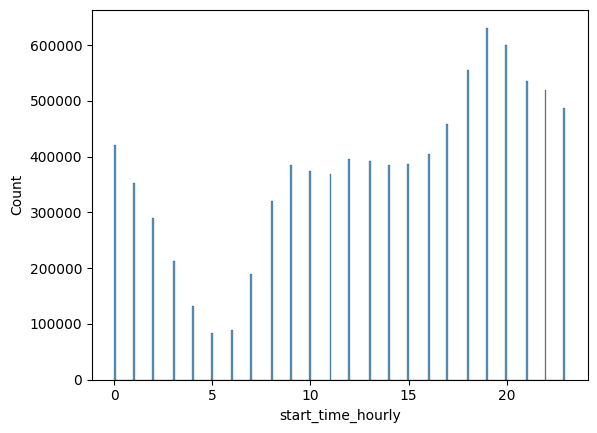

In [ ]:
sns.histplot(df["start_time_hourly"])

In [ ]:
#How many rides start per district
grouped = df[["start_time_hourly", "Trip_Minutes"]].groupby(["start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
start_time_hourly,
22,520307
21,536343
18,556159
20,599694
19,631681


In [ ]:
#How many rides end per district
grouped = df[["start_time_hourly", "Trip_Minutes"]].groupby(["start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
start_time_hourly,
22,520307
21,536343
18,556159
20,599694
19,631681


In [ ]:
#How many rides start-end combination 
grouped = df[["start_time_hourly", "Trip_Minutes"]].groupby(["start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

,Count
start_time_hourly,
22,520307
21,536343
18,556159
20,599694
19,631681


#### Day Bin size

<Axes: xlabel='Day_Ordered', ylabel='Count'>

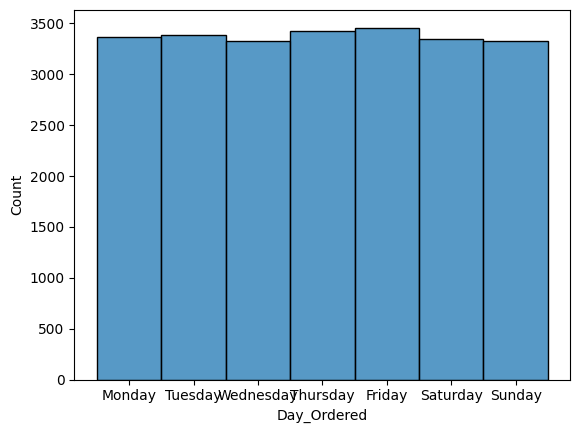

In [ ]:
#How many rides per day
df['Day_Ordered'] = pd.Categorical(df['dayOfWeek'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sns.histplot(df["Day_Ordered"])
# ax.set_xticks(["Mon", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

In [ ]:
#How many rides start per district
grouped = df[["dayOfWeek", "Trip_Minutes"]].groupby(["dayOfWeek"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

NameError: name 'df' is not defined

In [ ]:
#How many rides start per district
grouped = df[["dayOfWeek", "start_time_hourly", "Trip_Minutes"]].groupby(["dayOfWeek", "start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
dayOfWeek start_time_hourly        
Friday    19                 120252
          20                 120541
Saturday  20                 120620
          23                 124567
Sunday    0                  125118

#### Week bin size

<Axes: xlabel='start_time_week', ylabel='Count'>

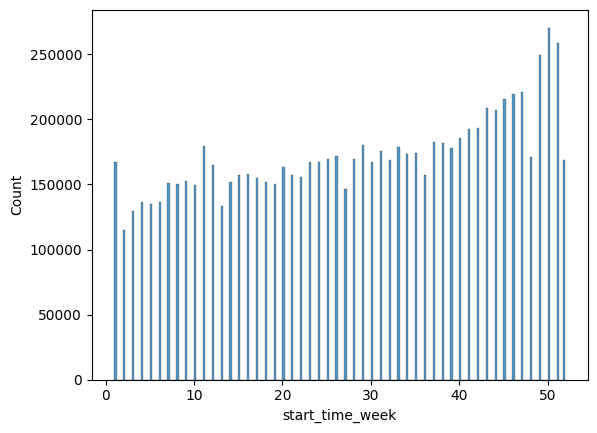

In [ ]:
sns.histplot(df["start_time_week"])

In [ ]:
#How many rides start per district
grouped = df[["start_time_week", "Trip_Minutes"]].groupby(["start_time_week"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
start_time_week start_time_hourly       
49              19                 18147
51              20                 18301
                19                 18799
50              20                 19427
                19                 19924

In [ ]:
#How many rides start per district
grouped = df[["start_time_week", "start_time_hourly", "Trip_Minutes"]].groupby(["start_time_week", "start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
start_time_week start_time_hourly       
49              19                 18147
51              20                 18301
                19                 18799
50              20                 19427
                19                 19924

#### Month bin size

<Axes: xlabel='start_time_month', ylabel='Count'>

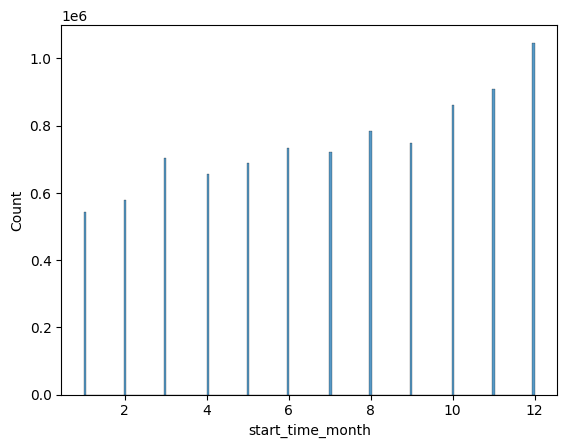

In [ ]:
sns.histplot(df["start_time_month"])

In [ ]:
#How many rides start per district
grouped = df[["start_time_month", "Trip_Minutes"]].groupby(["start_time_month"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
start_time_month start_time_hourly       
11               19                 64053
12               18                 64213
                 21                 65557
                 20                 74450
                 19                 75544

In [ ]:
#How many rides start per district
grouped = df[["start_time_month", "start_time_hourly", "Trip_Minutes"]].groupby(["start_time_month", "start_time_hourly"]).count().sort_values(by="Trip_Minutes").rename(columns={"Trip_Minutes": "Count"})
grouped.tail()

Count
start_time_month start_time_hourly       
11               19                 64053
12               18                 64213
                 21                 65557
                 20                 74450
                 19                 75544

In [23]:
#import dataset
df = pd.read_csv("./data/datasets/df_chicago_hourly.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Original_Trip_Start_Timestamp  8760 non-null   object 
 1   Original_Trip_End_Timestamp    8760 non-null   object 
 2   dayOfWeek                      8760 non-null   object 
 3   isHoliday                      8760 non-null   bool   
 4   season                         8760 non-null   object 
 5   start_time_hourly              8760 non-null   int64  
 6   start_time_day                 8760 non-null   int64  
 7   start_time_week                8760 non-null   int64  
 8   start_time_month               8760 non-null   int64  
 9   isRushhour                     8760 non-null   bool   
 10  pressure                       8760 non-null   float64
 11  humidity                       8760 non-null   float64
 12  temperature_celsius            8760 non-null   f

In [10]:
df.describe()

,start_time_hourly,start_time_day,start_time_week,start_time_month,pressure,humidity,temperature_celsius,wind_direction,wind_speed,numOfTaxisHourly
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,15.720548,26.430137,6.526027,1016.567580,73.788299,9.941311,193.205594,3.066667,1024.488584
std,6.922582,8.796749,15.047769,3.448048,8.470378,17.403184,11.209318,100.241101,2.238570,626.795697
min,0.000000,1.000000,1.000000,1.000000,979.000000,17.000000,-17.920000,0.000000,0.000000,49.000000
25%,5.750000,8.000000,13.000000,4.000000,1011.000000,62.000000,0.800000,109.000000,1.000000,568.750000
50%,11.500000,16.000000,26.000000,7.000000,1016.000000,76.000000,10.361000,210.000000,3.000000,996.000000
75%,17.250000,23.000000,39.000000,10.000000,1022.000000,89.000000,19.423000,273.000000,4.000000,1349.000000
max,23.000000,31.000000,52.000000,12.000000,1047.000000,100.000000,35.330000,360.000000,18.000000,4246.000000


In [24]:
def create_boxplot(x,y, data):
    sns.boxplot(x=x,y=y,data=data,palette=palette,hue="dayOfWeek",hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    fig = plt.gcf()
    fig.set_size_inches(16, 9)
    plt.title("Daily Fleet Usage Per Unique Hour & Weekday", fontsize=18)
    plt.xlabel("Starting Hour of Rental", fontsize=14, style='oblique')
    plt.ylabel("Number of rented bikes (per hour)", fontsize=14, style='oblique')
    plt.show()

## Start time

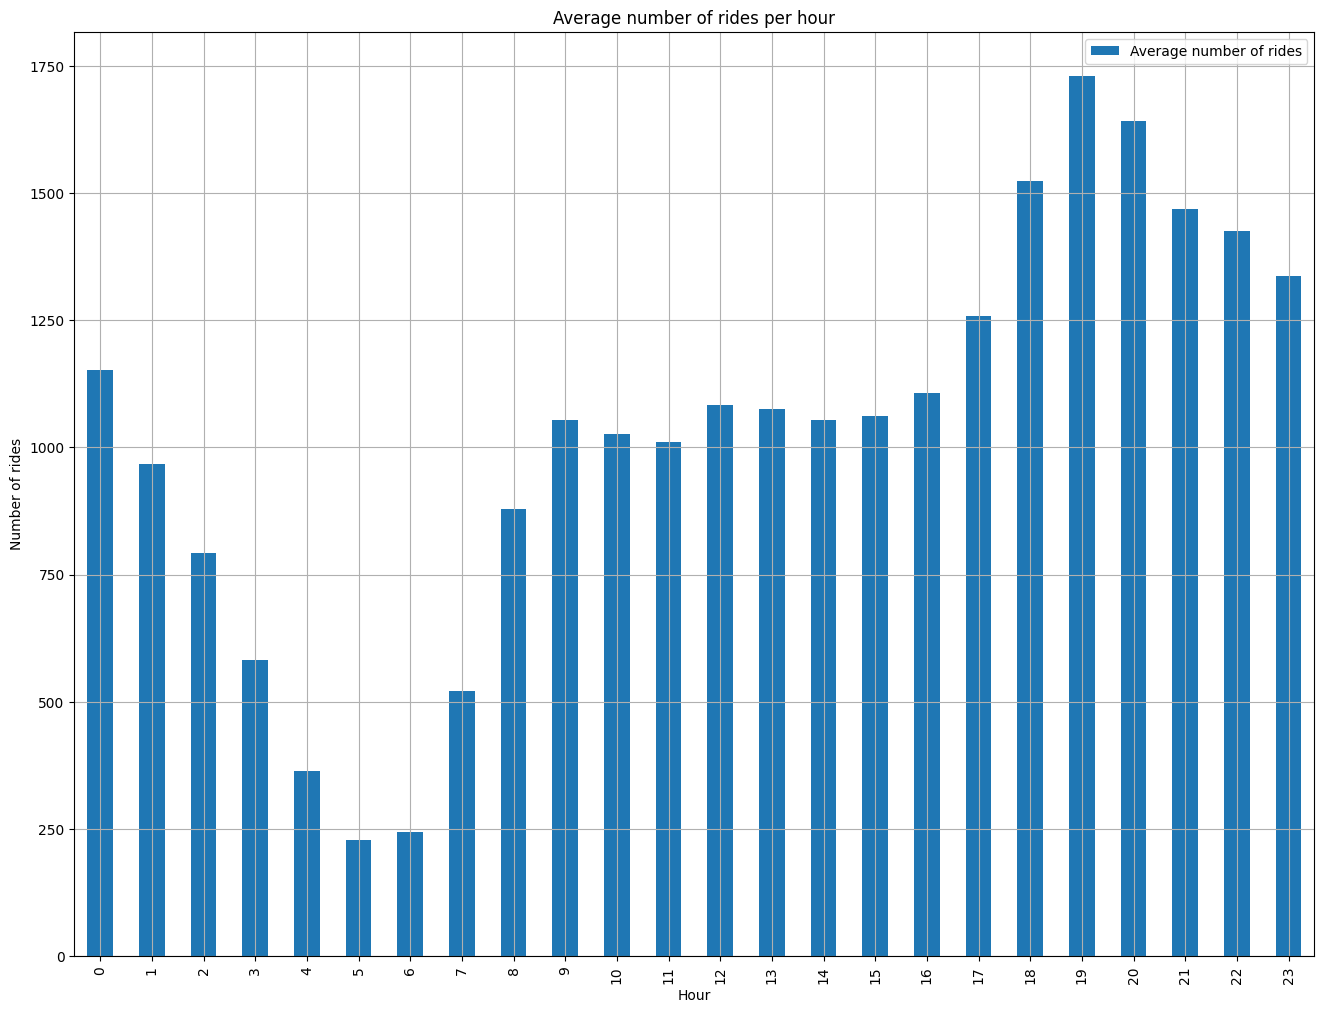

In [14]:
#because we average here, we need the dataset with 0 trips
grouped_hours = df[["start_time_hourly", "numOfTaxisHourly"]].groupby("start_time_hourly").mean()
grouped_hours.plot(kind='bar', ylabel='Number of rides', xlabel='hour', figsize=(16,12), alpha=1)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Number of rides")
plt.title("Average number of rides per hour")
plt.legend(["Average number of rides"])
plt.show()

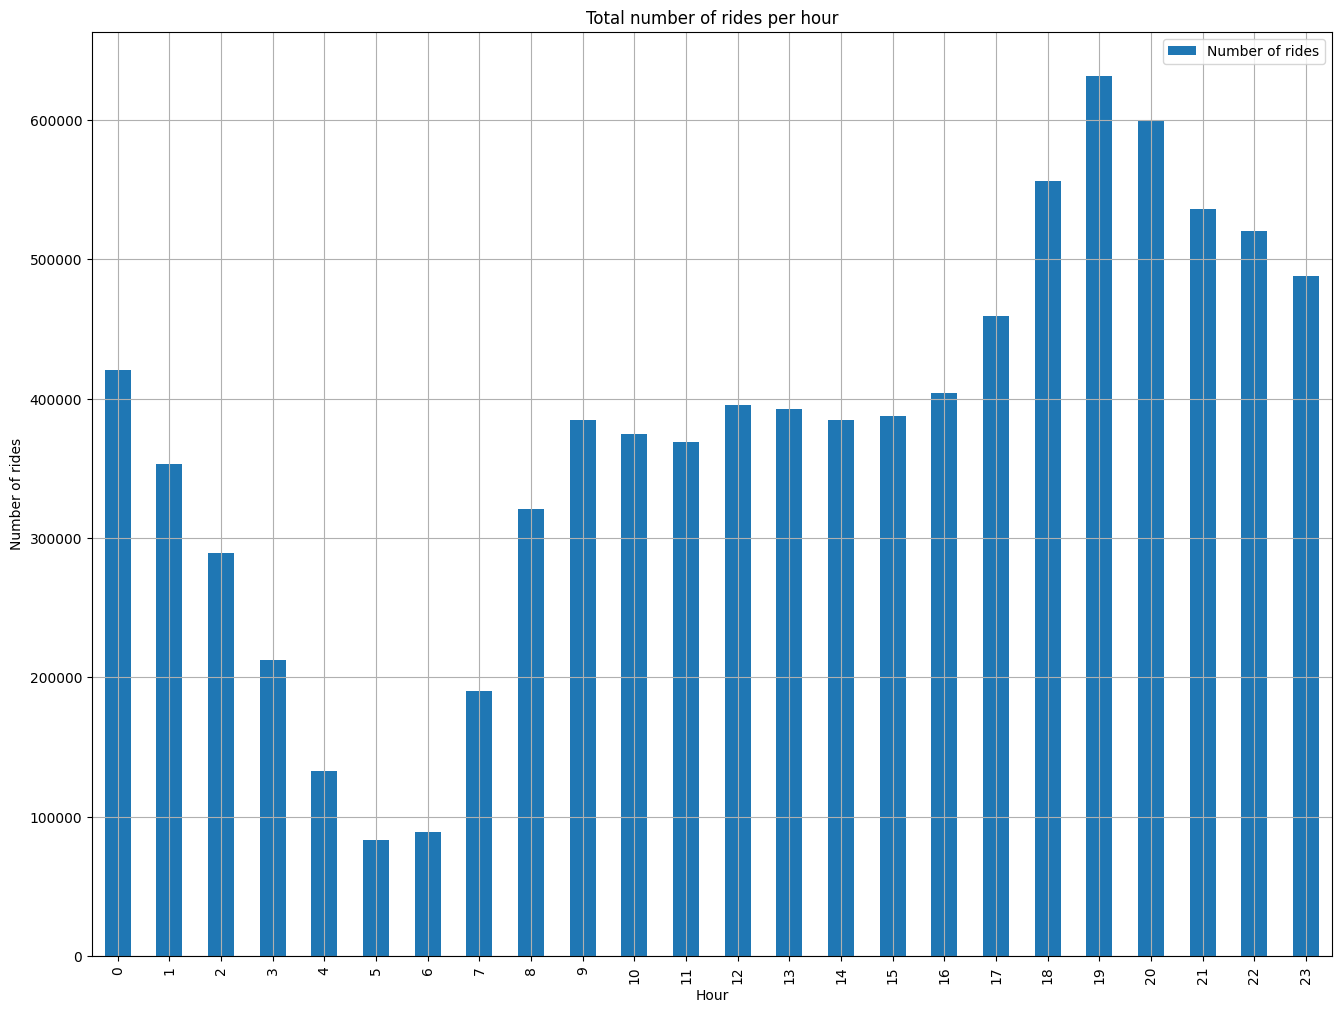

In [16]:
grouped_hours = df[["start_time_hourly", "numOfTaxisHourly"]].groupby("start_time_hourly").sum()
grouped_hours.plot(kind='bar', ylabel='Number of rides', xlabel='hour', figsize=(16,12), label='Num rides without 0', alpha=1)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Number of rides")
plt.title("Total number of rides per hour")
plt.legend(["Number of rides"])
plt.show()

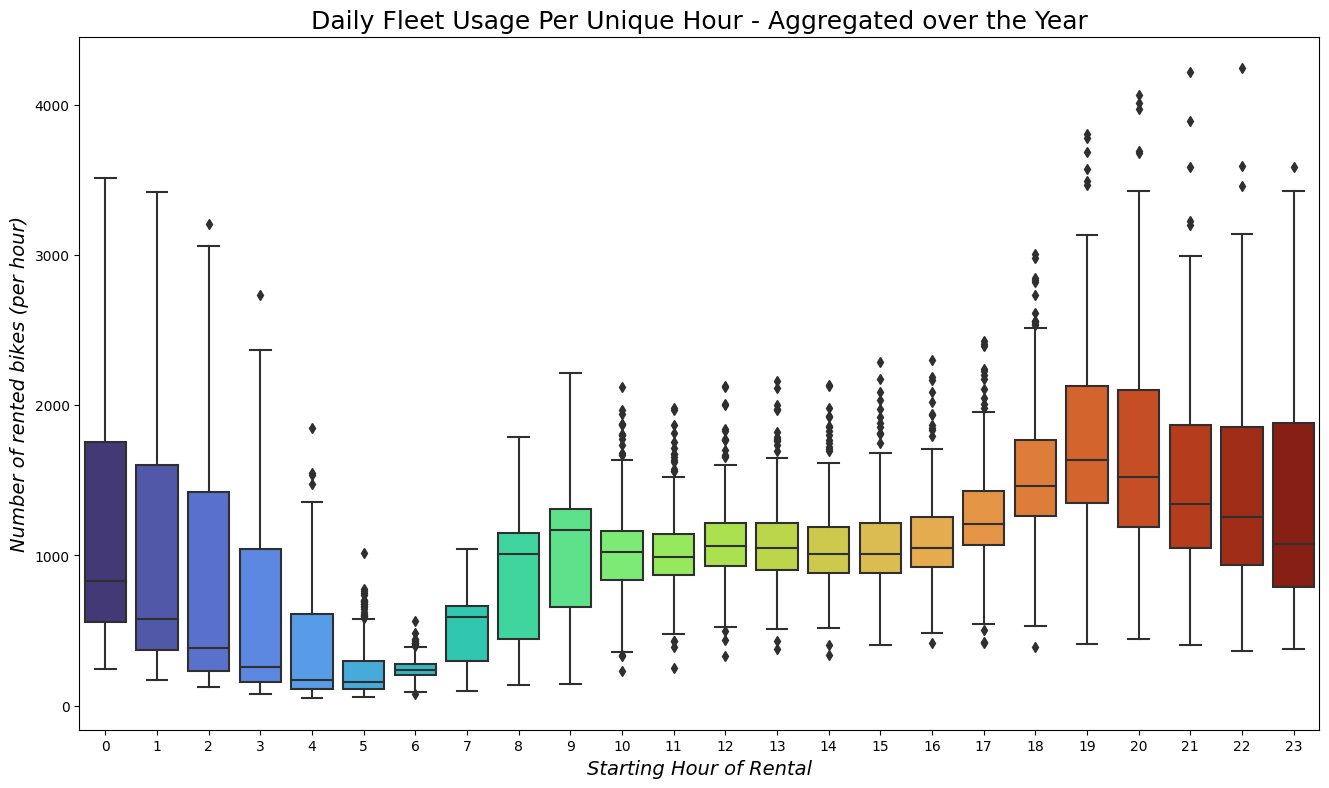

In [27]:
sns.boxplot(x="start_time_hourly",y="numOfTaxisHourly",data=df,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.title("Daily Fleet Usage Per Unique Hour - Aggregated over the Year", fontsize=18)
plt.xlabel("Starting Hour of Rental", fontsize=14, style='oblique')
plt.ylabel("Number of rented bikes (per hour)", fontsize=14, style='oblique')
plt.show()

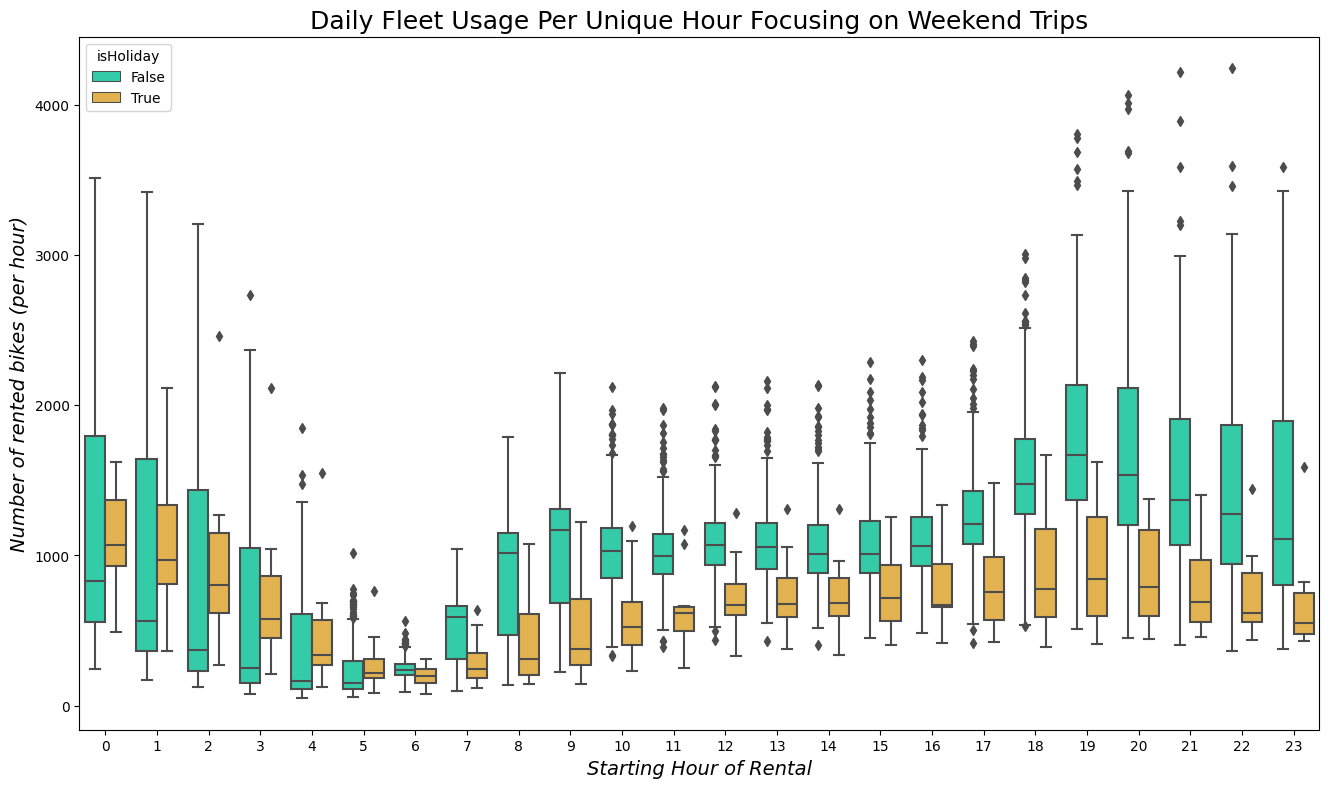

In [25]:
sns.boxplot(x="start_time_hourly",y="numOfTaxisHourly",data=df,palette=palette, hue="isHoliday")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.title("Daily Fleet Usage Per Unique Hour Focusing on Weekend Trips", fontsize=18)
plt.xlabel("Starting Hour of Rental", fontsize=14, style='oblique')
plt.ylabel("Number of rented bikes (per hour)", fontsize=14, style='oblique')
plt.show()

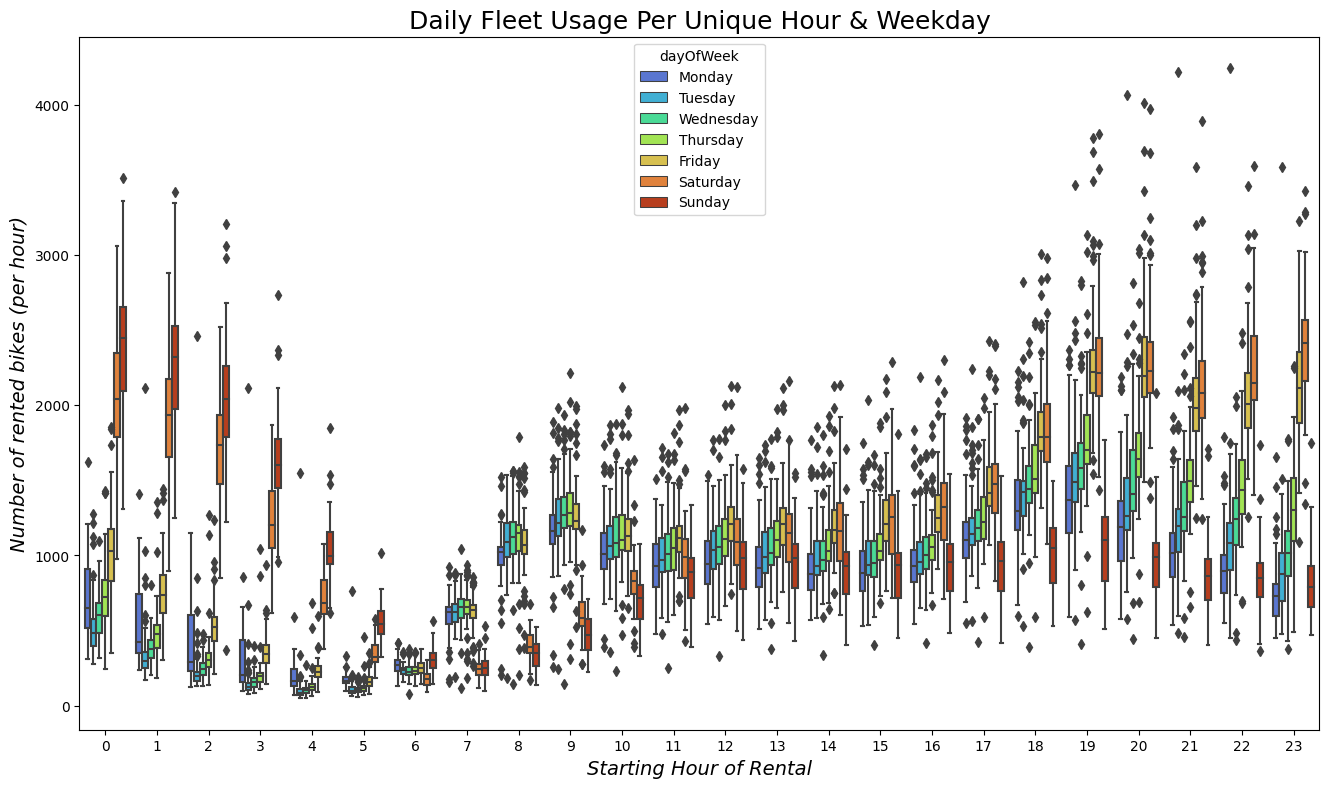

In [28]:
create_boxplot("start_time_hourly", "numOfTaxisHourly", df)

In [19]:
from h3 import h3
H3_HEXAGON_HIGH_RESOLUTION = 8
H3_HEXAGON_MEDIUM_RESOLUTION = 7
H3_HEXAGON_LOW_RESOLUTION = 6
time_bins = ["h", "2h", "6h", "24h"]
resolution = ["low", "med", "hig"]

In [ ]:

for j in resolution:
    for i in time_bins:
        df = pd.read_csv('./data/datasets/df_{time}_hex{res}.csv'.format(time=i,res=j))

        print(df.columns)

        column = "low"
        res = H3_HEXAGON_LOW_RESOLUTION
        base = h3.polyfill(desc.cityBoundingPolygonBig, res = res, geo_json_conformant = True)
        if(j == "low"):
            res = H3_HEXAGON_LOW_RESOLUTION
            base = h3.polyfill(desc.cityBoundingPolygonBig, res = res, geo_json_conformant = True)
            column = "low"
        elif(j== "med"):
            res = H3_HEXAGON_MEDIUM_RESOLUTION
            base = h3.polyfill(desc.cityBoundingPolygonBig, res = res, geo_json_conformant = True)
            column = "medium"
        elif(j== "hig"):
            res = H3_HEXAGON_HIGH_RESOLUTION
            # base = h3.polyfill(desc.cityBoundingPolygonSmall, res = res, geo_json_conformant = True)
            column = "high"
            base = h3.polyfill(desc.cityBoundingPolygonBig, res = res, geo_json_conformant = True)

        grouped_sum = desc.descr_stat(df, columns=['h3_hex_id_{res}_res'.format(res=column), "Trip_Minutes_x"], group_by=['h3_hex_id_{res}_res'.format(res=column)], sort=True, sort_by=["Trip_Minutes_x"], as_index=True, agg_mode="sum", plot=False, plot_map=True)
        prop = 'h3_hex_id_{res}_res'.format(res=column)
        grouped_sum = grouped_sum[0] #deconstruct from tuple

        low_val = grouped_sum.iloc[0]["Sum"]
        low_elems = grouped_sum[grouped_sum["Sum"] == low_val]
        if len(low_elems < 5): #if less than 5 are at lowest level, then use all 5 lowest with head function
            low_elems = grouped_sum.head()

        high_val = grouped_sum.iloc[len(grouped_sum)-1]["Sum"]
        high_elems = grouped_sum[grouped_sum["Sum"] == high_val]
        if len(high_elems) < 5: #if less than 5 are at highest level, then use all 5 highest with head function
            high_elems = grouped_sum.tail()

        sum_map = desc.visualize_hexagons(base, color="darkblue")
        sum_map = desc.visualize_hexagons(high_elems.index, color="darkgreen", folium_map=sum_map)
        sum_map = desc.visualize_hexagons(low_elems.index, color="darkred", folium_map=sum_map)

        grouped_avg = desc.descr_stat(df, columns=['h3_hex_id_{res}_res'.format(res=column), "Trip_Minutes_x"], group_by=['h3_hex_id_{res}_res'.format(res=column)], sort=True, sort_by=["Trip_Minutes_x"], as_index=True, agg_mode="mean", plot=False, plot_map=True)
        prop = 'h3_hex_id_{res}_res'.format(res=column)
        grouped_avg = grouped_avg[0] #deconstruct from tuple

        low_val = grouped_avg.iloc[0]["Average"]
        low_elems = grouped_avg[grouped_avg["Average"] == low_val]
        if len(low_elems) < 5: #if less than 5 are at lowest level, then use all 5 lowest with head function
            low_elems = grouped_avg.head()

        high_val = grouped_avg.iloc[len(grouped_avg)-1]["Average"]
        high_elems = grouped_avg[grouped_avg["Average"] == high_val]
        if len(high_elems < 5): #if less than 5 are at highest level, then use all 5 highest with head function
            high_elems = grouped_avg.tail()

        avg_map = desc.visualize_hexagons(base, color="darkblue")
        avg_map = desc.visualize_hexagons(high_elems.index, color="darkgreen", folium_map=avg_map)
        avg_map = desc.visualize_hexagons(low_elems.index, color="darkred", folium_map=avg_map)

        print("Avg map: \n")    
        display(avg_map)

## More features